## 資料匯入(.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
%matplotlib inline
plt.rcParams['font.family']='SimHei'   # 顯示中文 且為黑體
plt.style.use('ggplot')

#此為 未清理資料之資料集
raw_data = pd.read_csv('movie_metadata_1.csv')
data_color = pd.get_dummies(raw_data.color)    #將color內的值拆開
raw_data = raw_data.join(data_color)    #再將拆開的欄 加回到資料集中

raw_data_rating = pd.get_dummies(raw_data.content_rating)    #將content_rating(電影分級)內的值拆開  
raw_data = raw_data.join(raw_data_rating)
raw_data.loc[:,'count'] = 1     #新增一欄 值皆為1
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 49 columns):
color                        5031 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4994 non-null float64
duration                     5029 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4161 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5031 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## 資料預處理(清理、轉換)

In [2]:
data = pd.read_csv('movie_metadata_1.csv')
data = data.drop(['movie_imdb_link', 'actor_1_name','actor_2_name','actor_3_name','director_name',\
             'aspect_ratio','plot_keywords','movie_facebook_likes', 'actor_1_facebook_likes',\
                  'actor_2_facebook_likes', 'actor_3_facebook_likes', 'director_facebook_likes',\
                 'cast_total_facebook_likes'], axis=1)    #刪除一些沒有要分析的欄
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 15 columns):
color                     5031 non-null object
num_critic_for_reviews    4994 non-null float64
duration                  5029 non-null float64
gross                     4161 non-null float64
genres                    5043 non-null object
movie_title               5043 non-null object
num_voted_users           5043 non-null int64
facenumber_in_poster      5031 non-null float64
num_user_for_reviews      5022 non-null float64
language                  5034 non-null object
country                   5040 non-null object
content_rating            4742 non-null object
budget                    4553 non-null float64
title_year                4937 non-null float64
imdb_score                5043 non-null float64
dtypes: float64(8), int64(1), object(6)
memory usage: 591.1+ KB


In [3]:
data = data.dropna().reset_index(drop=True)   # 清除資料中所有 有遺失值 的列 

data_color = pd.get_dummies(data.color)    #將color內的值拆開
df = data.join(data_color)    
data_rating = pd.get_dummies(data.content_rating)    #將content_rating(電影分級)內的值拆開  
df = df.join(data_rating)
df.loc[:,'count'] = 1     #新增一欄 值皆為1
df['title_year'] = df['title_year'].astype('int')    #將 年 轉換成整數
#data_rating.tail(4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 30 columns):
color                     3831 non-null object
num_critic_for_reviews    3831 non-null float64
duration                  3831 non-null float64
gross                     3831 non-null float64
genres                    3831 non-null object
movie_title               3831 non-null object
num_voted_users           3831 non-null int64
facenumber_in_poster      3831 non-null float64
num_user_for_reviews      3831 non-null float64
language                  3831 non-null object
country                   3831 non-null object
content_rating            3831 non-null object
budget                    3831 non-null float64
title_year                3831 non-null int32
imdb_score                3831 non-null float64
 Black and White          3831 non-null uint8
Color                     3831 non-null uint8
Approved                  3831 non-null uint8
G                         3831 non-null uint8

##  電影分級、電影產量

In [4]:
raw_data[['content_rating']].T

,0,1,2,3,4,5,6,7,8,9,...,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042
content_rating,PG-13,PG-13,PG-13,PG-13,PG-13,PG-13,PG-13,PG,PG-13,PG,...,PG-13,Not Rated,R,PG-13,Not Rated,NaN,TV-14,NaN,PG-13,PG


In [5]:
# 資料集中第一部電影年份
raw_data[raw_data['title_year']==raw_data['title_year'].min()][['title_year','movie_title','director_name','budget', 'gross']]

,title_year,movie_title,director_name,budget,gross
4810,1916.0,Intolerance: Love's Struggle Throughout the Ages?,D.W. Griffith,385907.0,NaN


In [33]:
# 1970年為第一年電影產量平均每月一部，1977年開始每年每月平均都有一部以上的電影產出
#raw_data_rating = raw_data_rating.join(df[['count','title_year']])
raw_data_rating = raw_data.groupby(['title_year'])[['Approved','G','GP','M','NC-17','Not Rated','PG','PG-13','Passed','R','Unrated','X','count']].sum()
raw_data_rating[raw_data_rating['count']>=12].head(6)

,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X,count
title_year,,,,,,,,,,,,,
1970.0,0,4,1,0,0,0,1,0,0,5,0,1,12
1977.0,0,0,0,0,0,0,13,0,0,2,1,0,16
1978.0,0,1,0,0,0,0,8,1,0,6,0,0,16
1979.0,0,2,0,0,0,0,8,0,0,6,0,0,16
1980.0,0,0,0,0,0,0,10,0,0,13,0,1,24
1981.0,0,0,0,0,1,0,15,0,0,16,0,1,33


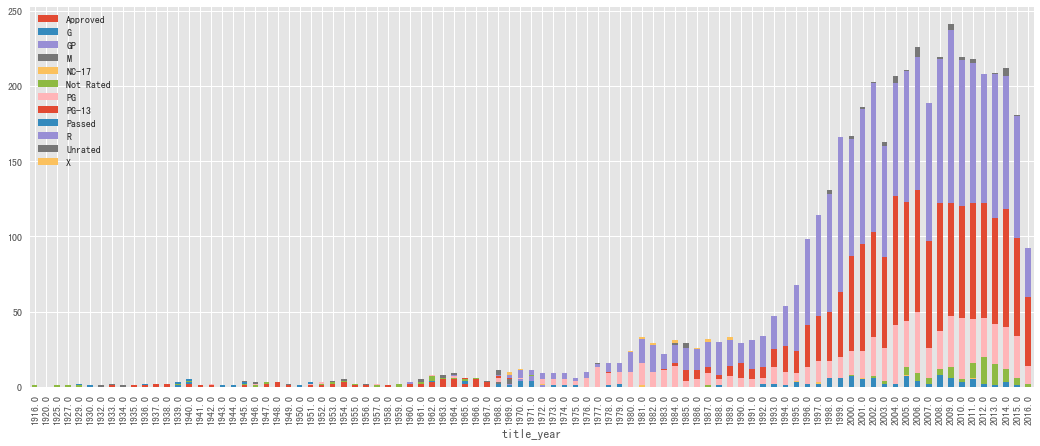

In [34]:
plt_rawdata = raw_data_rating
del plt_rawdata['count']
plt_rawdata.plot(kind = 'bar',stacked = True, figsize=(18,7))
plt.show()

##  電影預算與票房

In [7]:
#時間序列轉換
time_money = df[['title_year', 'gross', 'budget']]
time_money = time_money.set_index(time_money['title_year'], drop = True)
del time_money['title_year']
time_money.index = pd.to_datetime(time_money.index, format = '%Y')
time_money.head()

,gross,budget
title_year,,
2009-01-01,760505847.0,237000000.0
2007-01-01,309404152.0,300000000.0
2015-01-01,200074175.0,245000000.0
2012-01-01,448130642.0,250000000.0
2012-01-01,73058679.0,263700000.0


## 資料聚合與樞紐分析

In [4]:
# 每年產出的 彩色/黑白電影 產量 - 使用清理前之資料
df_color = raw_color.pivot_table(values='count', index='title_year',columns='color',aggfunc='sum')
df_color.head(3)

color,Black and White,Color
title_year,,
1916.0,1.0,NaN
1920.0,1.0,NaN
1925.0,1.0,NaN


In [43]:
# 每年 電影票房與電影預算的平均 - 使用清理後之資料
df.groupby(['title_year'])[['gross','budget']].mean().head(3)

,gross,budget
title_year,,
1927,26435.0,6000000.0
1929,2808000.0,379000.0
1933,2300000.0,439000.0


In [6]:
# 每國電影總產量 與 宣傳海報上臉出現的平均
country_face = df.groupby(['country'])['facenumber_in_poster'].mean()
country_face = pd.DataFrame(country_face)
country_sum = df.groupby(['country'])['count'].sum()
country_sum = pd.DataFrame(country_sum)
face = pd.merge(country_face, country_sum, left_index=True, right_index=True, how = 'outer')
face

,facenumber_in_poster,count
country,,
Afghanistan,1.000000,1
Argentina,0.000000,3
Aruba,0.000000,1
Australia,1.050000,40
Belgium,1.000000,1
Brazil,0.800000,5
Canada,1.145161,62
Chile,7.000000,1
China,1.692308,13


In [7]:
face[face['count']>=5]

,facenumber_in_poster,count
country,,
Australia,1.050000,40
Brazil,0.800000,5
Canada,1.145161,62
China,1.692308,13
Denmark,0.777778,9
France,1.078431,102
Germany,1.400000,80
Hong Kong,1.000000,13
India,2.000000,5


## 資料分析方法

### 相關性分析

In [2]:
df_corr = data[['title_year','budget','gross','duration','actor_1_facebook_likes','actor_2_facebook_likes',\
                'actor_3_facebook_likes','director_facebook_likes','cast_total_facebook_likes','facenumber_in_poster',\
               'imdb_score','num_user_for_reviews','num_critic_for_reviews','num_voted_users']]
corr = df_corr.corr()
corr

,title_year,budget,gross,duration,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,director_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,imdb_score,num_user_for_reviews,num_critic_for_reviews,num_voted_users
title_year,1.000000,0.045729,0.030886,-0.135038,0.086873,0.101890,0.096137,-0.063820,0.109971,0.061504,-0.209167,-0.003147,0.275707,0.007397
budget,0.045729,1.000000,0.102178,0.074277,0.022639,0.044236,0.047451,0.021090,0.036558,-0.019559,0.030687,0.084292,0.119994,0.079621
gross,0.030886,0.102178,1.000000,0.250298,0.154468,0.262768,0.308026,0.144945,0.247400,-0.027755,0.198021,0.559958,0.480601,0.637271
duration,-0.135038,0.074277,0.250298,1.000000,0.088449,0.131673,0.123558,0.173296,0.123074,0.013469,0.261662,0.328403,0.258486,0.314765
actor_1_facebook_likes,0.086873,0.022639,0.154468,0.088449,1.000000,0.390487,0.249927,0.090723,0.951661,0.072257,0.076099,0.145461,0.190016,0.192804
actor_2_facebook_likes,0.101890,0.044236,0.262768,0.131673,0.390487,1.000000,0.559662,0.119601,0.628404,0.071228,0.083808,0.219496,0.282306,0.270790
actor_3_facebook_likes,0.096137,0.047451,0.308026,0.123558,0.249927,0.559662,1.000000,0.120199,0.473920,0.099368,0.052633,0.230189,0.271646,0.287239
director_facebook_likes,-0.063820,0.021090,0.144945,0.173296,0.090723,0.119601,0.120199,1.000000,0.119549,-0.041268,0.170802,0.221890,0.180674,0.297057
cast_total_facebook_likes,0.109971,0.036558,0.247400,0.123074,0.951661,0.628404,0.473920,0.119549,1.000000,0.091475,0.085787,0.206923,0.263203,0.265911
facenumber_in_poster,0.061504,-0.019559,-0.027755,0.013469,0.072257,0.071228,0.099368,-0.041268,0.091475,1.000000,-0.062958,-0.069018,-0.033897,-0.026998


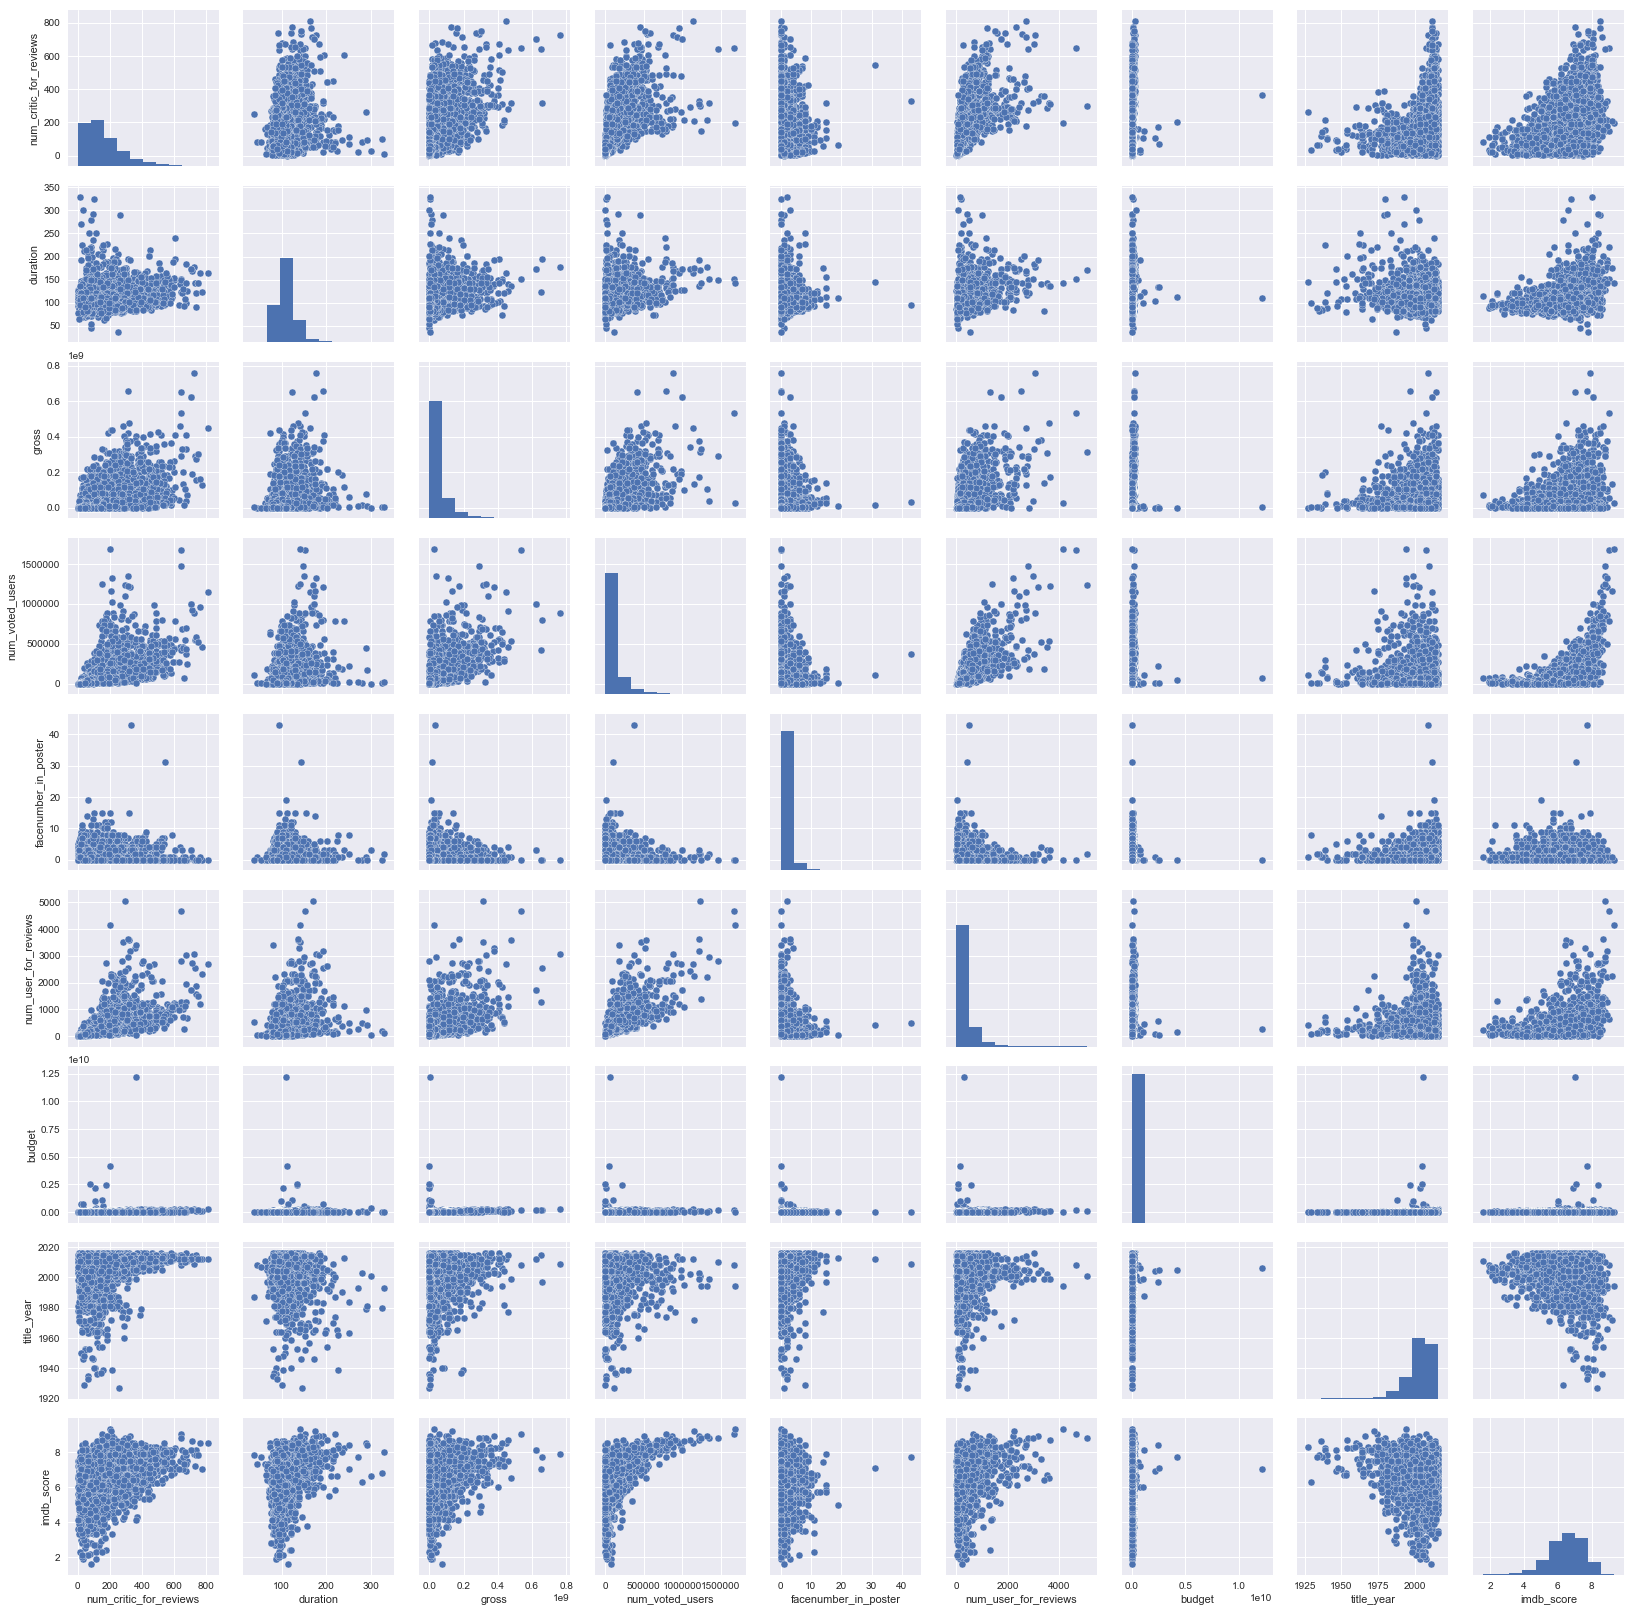

In [106]:
sns.pairplot(data)

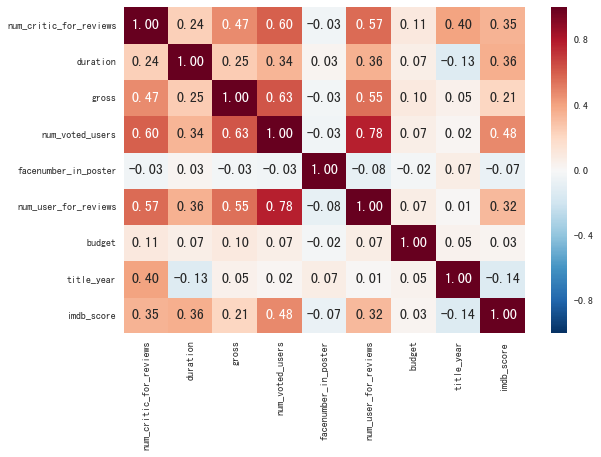

In [177]:
plt.rcParams['savefig.bbox'] = 'tight'
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(data.corr(), annot=True,fmt='.2f', annot_kws={'size': 14}, ax=ax )
fig.savefig("corr.png")

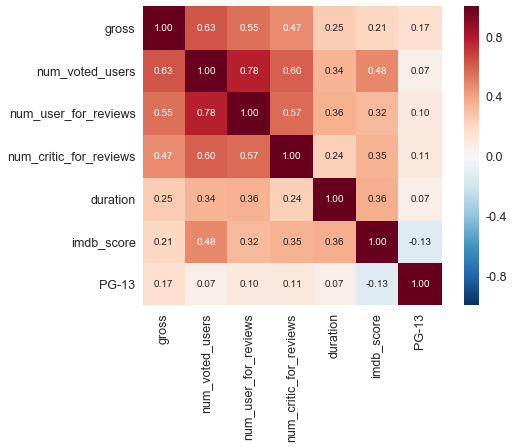

In [54]:
#原版
corrmat = df.corr()
#gross correlation matrix
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'gross')['gross'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

### 描述性統計

In [31]:
df[['imdb_score','gross','budget','duration']].describe()

,imdb_score,gross,budget,duration
count,3824.000000,3.824000e+03,3.824000e+03,3824.000000
mean,6.459440,5.174780e+07,4.551915e+07,110.020659
std,1.057863,6.999886e+07,2.240589e+08,22.571544
min,1.600000,1.620000e+02,2.180000e+02,37.000000
25%,5.900000,7.494118e+06,1.000000e+07,95.000000
50%,6.600000,2.887515e+07,2.500000e+07,106.000000
75%,7.200000,6.605946e+07,5.000000e+07,120.000000
max,9.300000,7.605058e+08,1.221550e+10,330.000000


### 時間序列分析

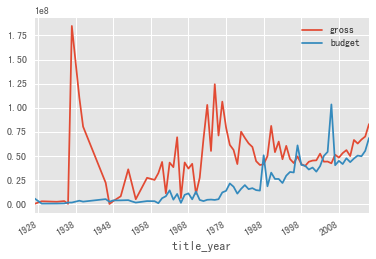

In [182]:
#電影預算與票房之趨勢
time_ana = time_money.groupby(time_money.index).mean()
time_ana.plot(kind = 'line')
# ps. 1937年美國出產的第一部彩色動畫電影:白雪公主， 即是下圖中票房異常高的點

## 視覺化

###  畫 電影年產量

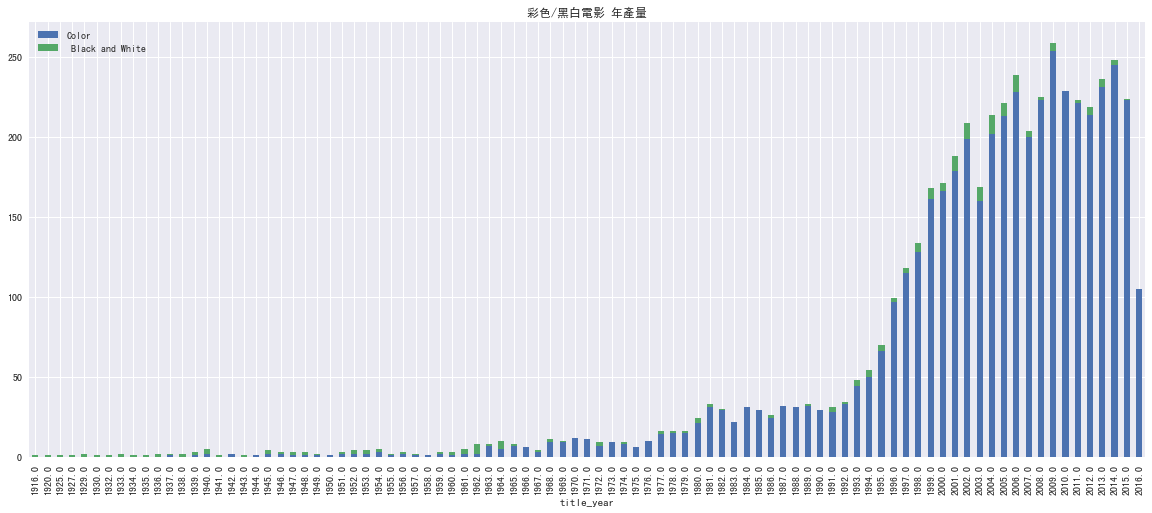

In [12]:
#未清理資料前的 彩色/黑白 電影數量
plt.rcParams['font.family']='SimHei' 
df_color = raw_color.groupby(['title_year'])[['Color',' Black and White']].sum()
df_color.plot(kind='bar',align='center',figsize=(20,8),stacked = True, grid = True, title = '彩色/黑白電影 年產量')

### IMDB 分數之分佈

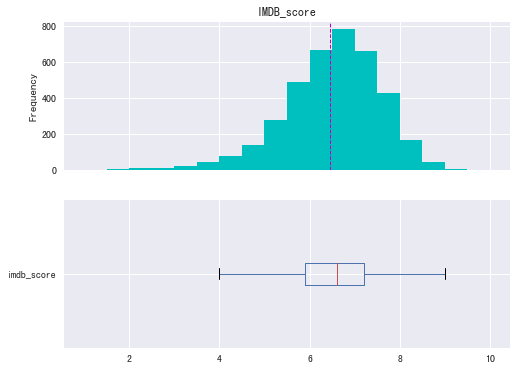

In [13]:
#所有電影 IMDB_score之分佈
plt.figure( figsize = (8,6) )

ax1 = plt.subplot(211)
imdb_score = df['imdb_score']
imdb_score.plot(kind = 'hist', bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10], color = 'c')
plt.title('IMDB_score')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.axvline(imdb_score.mean(), color='m', linestyle='dashed', linewidth=1)

plt.subplot(212, sharex = ax1)
imdb_score.plot(kind = 'box', vert=False, grid = True,  showfliers=True)

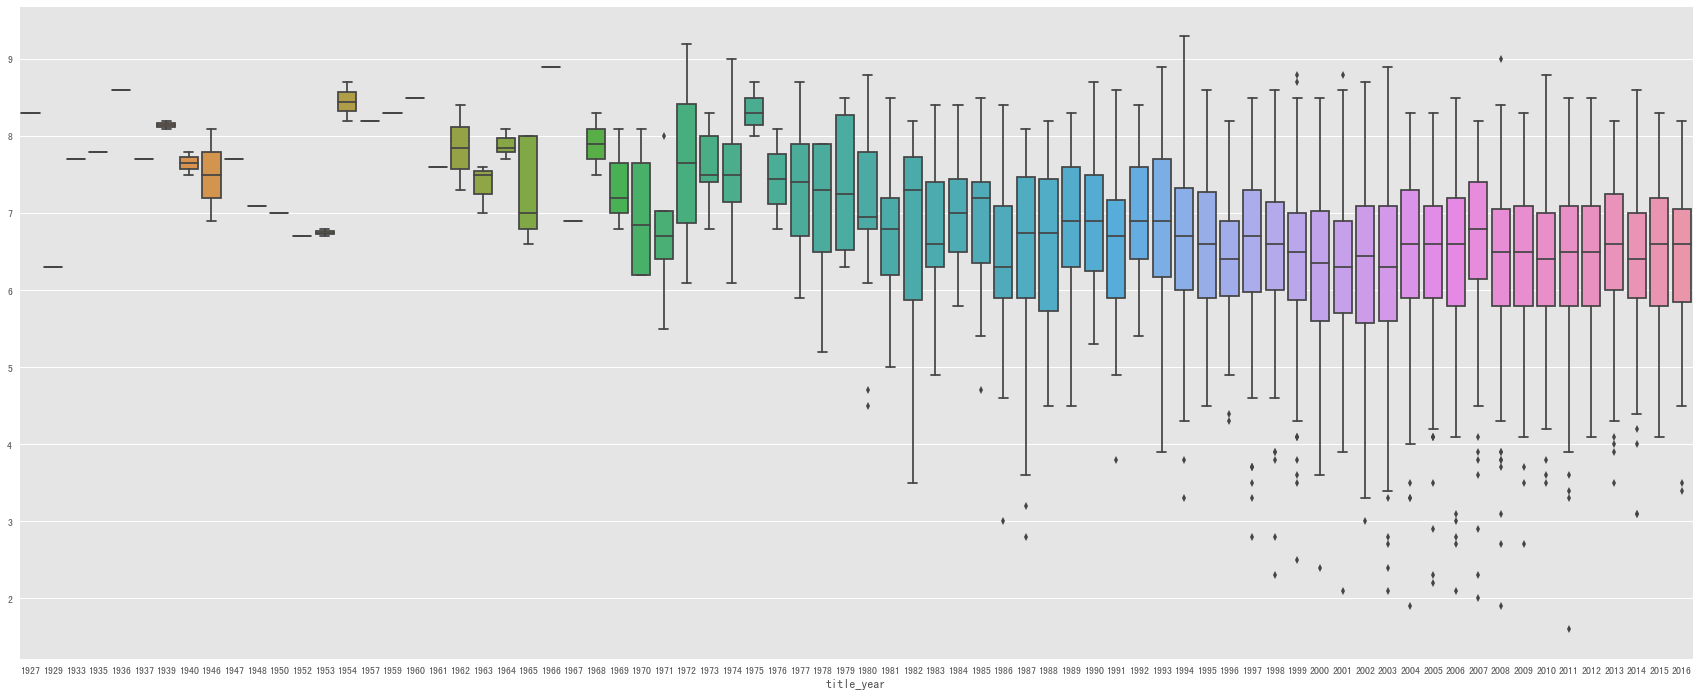

In [8]:
# 歷年IMDB_score分佈
year_imdb = df.groupby('title_year')['imdb_score'].apply(list)
year_imdb = pd.DataFrame(year_imdb)
for index in year_imdb.index.values:
    for col in year_imdb.columns.values:
        if(type(year_imdb.loc[index, col])) == list:  
            for i in range (len(year_imdb.loc[index, col])):   
                year_imdb.loc[index, i] = year_imdb.loc[index, col][i]   
del year_imdb['imdb_score']
plt.subplots(figsize=(30,12))
sns.boxplot(data = year_imdb.T)

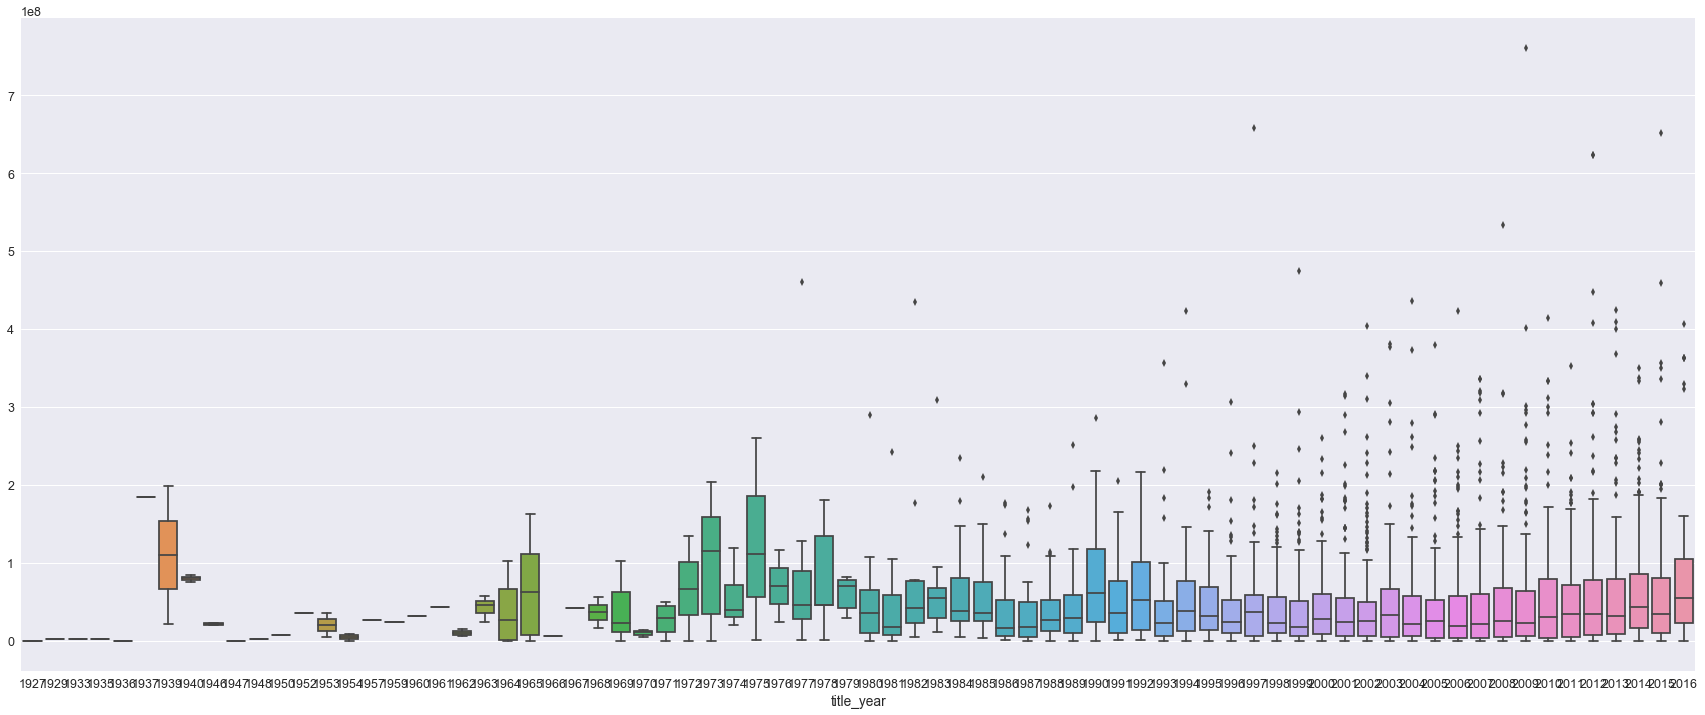

In [57]:
# 歷年 票房 分佈
year_gross = df.groupby('title_year')['gross'].apply(list)
year_gross = pd.DataFrame(year_gross)
for index in year_gross.index.values:
    for col in year_gross.columns.values:
        if(type(year_gross.loc[index, col])) == list:  
            for i in range (len(year_gross.loc[index, col])):   
                year_gross.loc[index, i] = year_gross.loc[index, col][i]   
del year_gross['gross']
plt.subplots(figsize=(30,12))
sns.boxplot(data = year_gross.T)

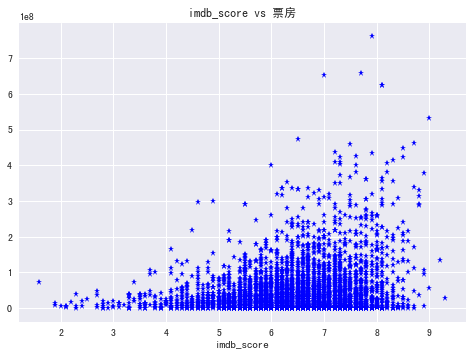

In [174]:
plt.rcParams['font.family']='SimHei' 
plt.plot(df.imdb_score, df.gross, '*', color = 'blue')
plt.title('imdb_score vs 票房')
plt.xlabel('imdb_score')

### 電影的出產地區、語種 - 圓餅圖

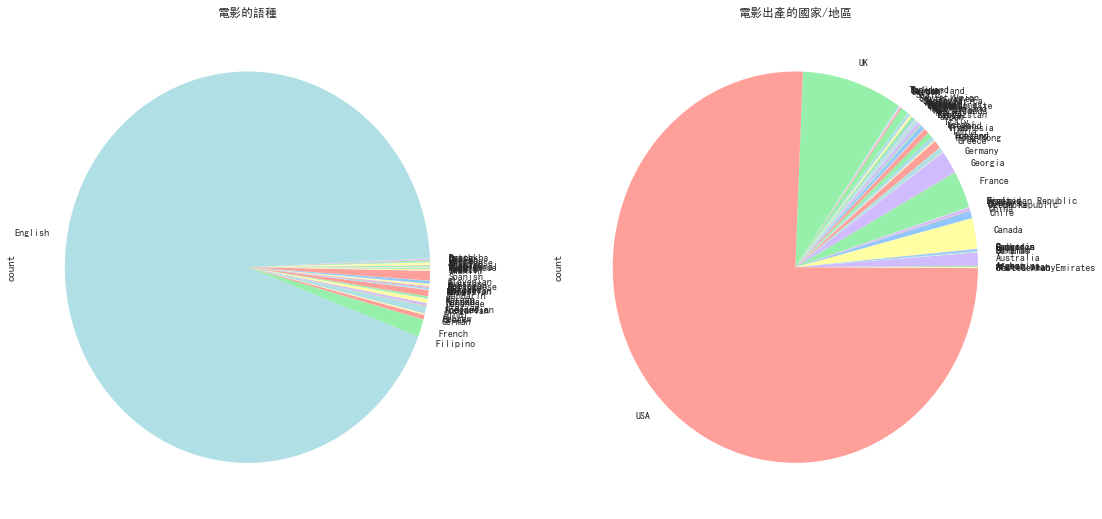

In [119]:
plt.rcParams['font.family']='SimHei' 
plt.rcParams['savefig.bbox'] = 'tight'
plt.figure(figsize=(18,9))
plt.style.use('seaborn-pastel')
language = raw_data.groupby('language')['count'].sum()
plt.subplot(121)
language.plot(kind = 'pie')
plt.title('電影的語種')

country = raw_data.groupby('country')['count'].sum()
plt.subplot(122)
country.plot(kind = 'pie')
plt.title('電影出產的國家/地區')
plt.savefig('movie.png')

### IMDB分數與評論數之相關

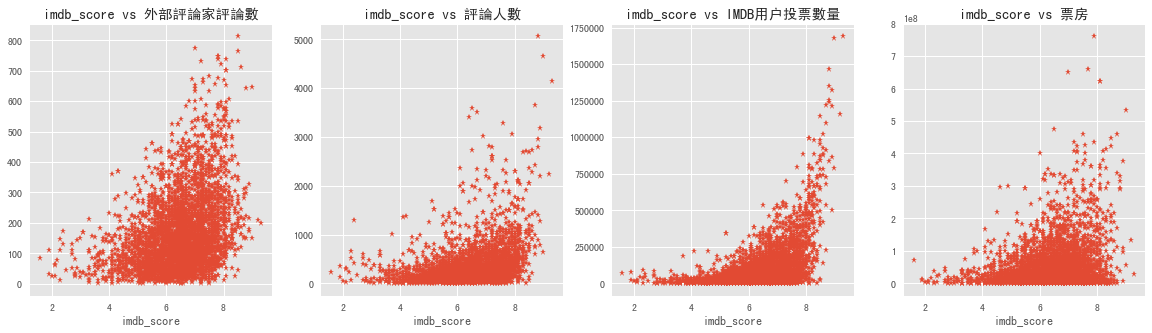

In [16]:
plt.rcParams['font.family']='SimHei' 
plt.style.use('ggplot')
plt.figure(figsize = (20,5))
ax1 = plt.subplot(141)
plt.plot(df.imdb_score, df.num_critic_for_reviews, '*')
plt.title('imdb_score vs 外部評論家評論數')
plt.xlabel('imdb_score')

ax1 = plt.subplot(142)
plt.plot(df.imdb_score, df.num_user_for_reviews, '*')
plt.title('imdb_score vs 評論人數')
plt.xlabel('imdb_score')

ax1 = plt.subplot(143)
plt.plot(df.imdb_score, df.num_voted_users, '*')
plt.title('imdb_score vs IMDB用户投票數量')
plt.xlabel('imdb_score')

ax1 = plt.subplot(144)
plt.plot(df.imdb_score, df.gross, '*')
plt.title('imdb_score vs 票房')
plt.xlabel('imdb_score')

### 各電影類型的數量

In [19]:
df.genres.head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4            Action|Adventure|Sci-Fi
Name: genres, dtype: object

In [20]:
#將電影類型取出來 一個類型為一列____原
df_clean = df[['genres', 'title_year']].dropna()
df_genre = pd.DataFrame(columns = ['genres', 'year'])
def genreRemap(row):
    global df_genre
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['year'] = [row['title_year']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)
df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)
df_genre = df_genre[['genre','cgenres', 'year']]
df_genre.head()

,genre,cgenres,year
0,Action,"[Adventure, Fantasy, Sci-Fi]",2009
1,Adventure,"[Action, Fantasy, Sci-Fi]",2009
2,Fantasy,"[Action, Adventure, Sci-Fi]",2009
3,Sci-Fi,"[Action, Adventure, Fantasy]",2009
4,Action,"[Adventure, Fantasy]",2007


In [10]:
df_clean = raw_data[['genres', 'title_year', 'budget', 'gross', 'imdb_score']].dropna()
df_genre = pd.DataFrame(columns = ['genres', 'year', 'budget', 'gross','imdb_score'])
def genreRemap(row):
    global df_genre
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['year'] = [row['title_year']]*n
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['imdb_score'] = [row['imdb_score']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres)
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)
df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)
df_genre = df_genre[['genre','cgenres', 'year', 'budget', 'gross','imdb_score']]
df_genre.head()

,genre,cgenres,year,budget,gross,imdb_score
0,Action,"[Action, Adventure, Fantasy, Sci-Fi]",2009,237000000.0,760505847.0,7.9
1,Adventure,"[Action, Adventure, Fantasy, Sci-Fi]",2009,237000000.0,760505847.0,7.9
2,Fantasy,"[Action, Adventure, Fantasy, Sci-Fi]",2009,237000000.0,760505847.0,7.9
3,Sci-Fi,"[Action, Adventure, Fantasy, Sci-Fi]",2009,237000000.0,760505847.0,7.9
4,Action,"[Action, Adventure, Fantasy]",2007,300000000.0,309404152.0,7.1


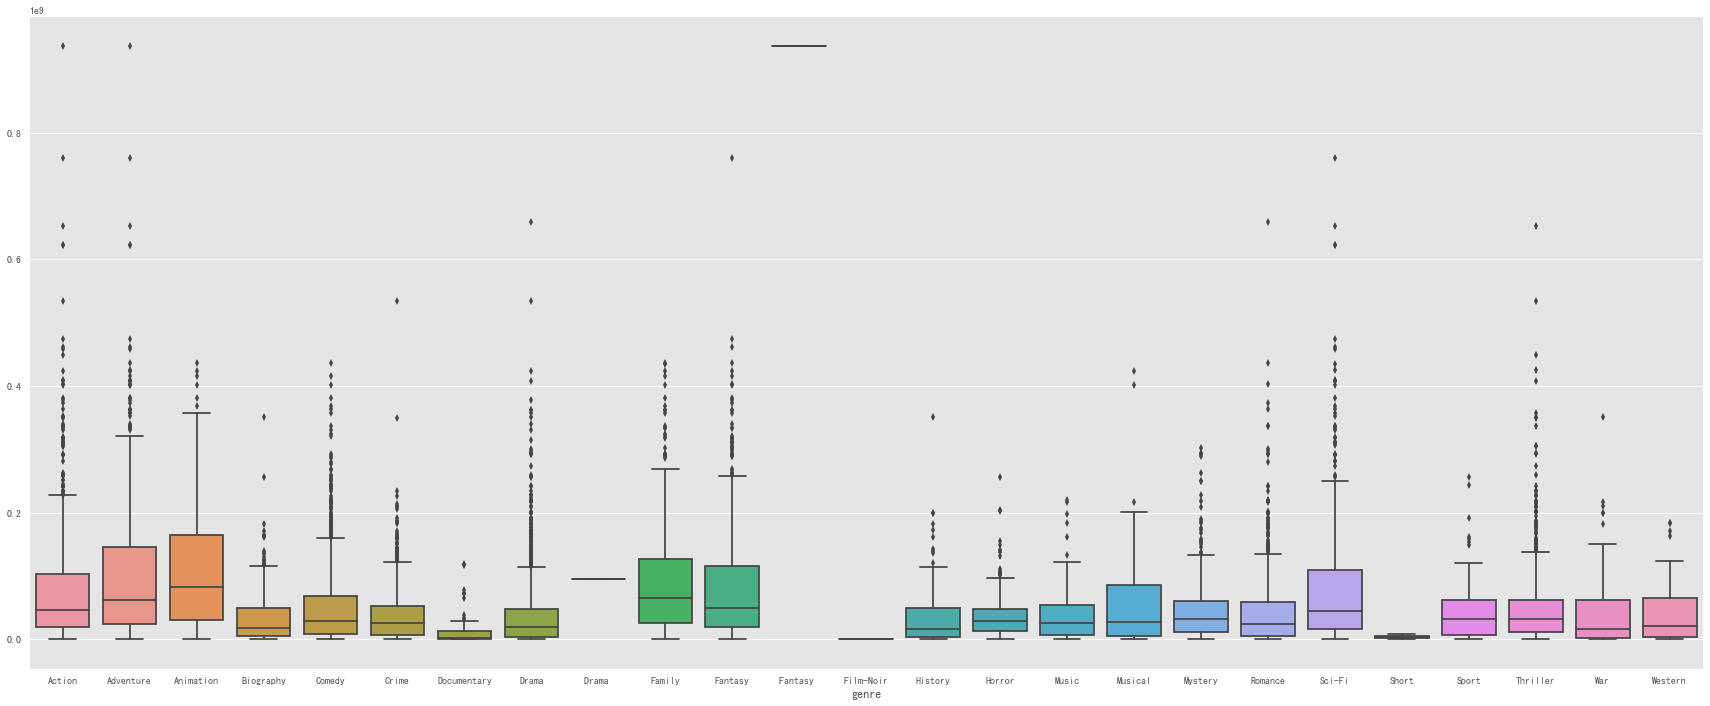

In [216]:
# 電影種類 票房分佈
genre_gross = df_genre.groupby('genre')['gross'].apply(list)
genre_gross = pd.DataFrame(genre_gross)
for index in genre_gross.index.values:
    for col in genre_gross.columns.values:
        if(type(genre_gross.loc[index, col])) == list:  
            for i in range (len(genre_gross.loc[index, col])):   
                genre_gross.loc[index, i] = genre_gross.loc[index, col][i]   
del genre_gross['gross']
plt.subplots(figsize=(30,12))
sns.boxplot(data = genre_gross.T)

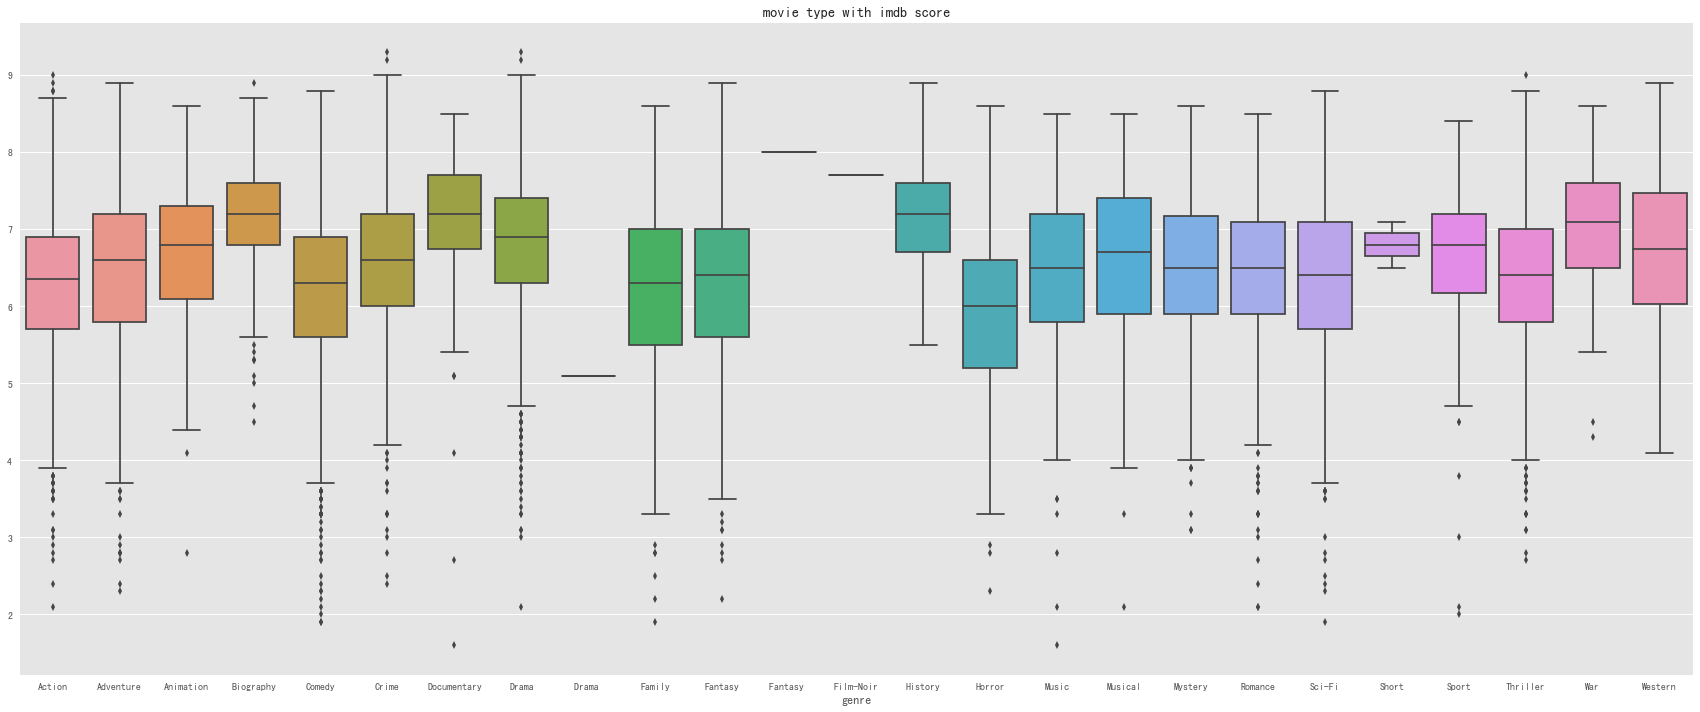

In [11]:
# 電影種類  imdb_score分佈
genre_score = df_genre.groupby('genre')['imdb_score'].apply(list)
genre_score = pd.DataFrame(genre_score)
for index in genre_score.index.values:
    for col in genre_score.columns.values:
        if(type(genre_score.loc[index, col])) == list:  
            for i in range (len(genre_score.loc[index, col])):   
                genre_score.loc[index, i] = genre_score.loc[index, col][i]   
del genre_score['imdb_score']
plt.subplots(figsize=(30,12))
sns.boxplot(data = genre_score.T)
sns.plt.title('movie type with imdb score')
plt.savefig('genre_score.png')

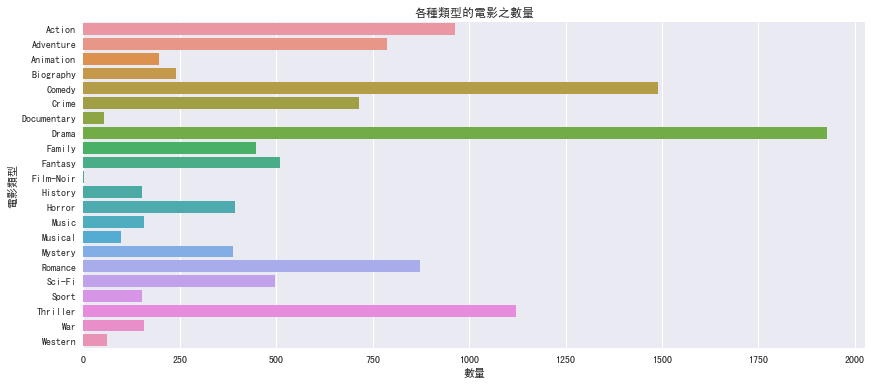

In [21]:
plt.rcParams['font.family']='SimHei'
genre_count = df_genre['genre'].value_counts().sort_index()
df_gCount = pd.DataFrame({'genre': genre_count.index, 'count': genre_count.values})
f, ax = plt.subplots(figsize = (14,6))
sns.barplot(x = 'count', y = 'genre', data = df_gCount)
ax.set_title('各種類型的電影之數量')
ax.set_xlabel('數量')
ax.set_ylabel('電影類型')

In [19]:
#依年份觀察 各電影類型數量
# year_2016
year_2016 = df_genre[df_genre['year']==2016]
year_2016_count = year_2016['genre'].value_counts().sort_index()
year_2016_gCount = pd.DataFrame({'genre': year_2016_count.index, 'count': year_2016_count.values})

# year_2015
year_2015 = df_genre[df_genre['year']==2015]
year_2015_count = year_2015['genre'].value_counts().sort_index()
year_2015_gCount = pd.DataFrame({'genre': year_2015_count.index, 'count': year_2015_count.values})

# year_2014
year_2014 = df_genre[df_genre['year']==2014]
year_2014_count = year_2014['genre'].value_counts().sort_index()
year_2014_gCount = pd.DataFrame({'genre': year_2014_count.index, 'count': year_2014_count.values})

# year_2013
year_2013 = df_genre[df_genre['year']==2013]
year_2013_count = year_2013['genre'].value_counts().sort_index()
year_2013_gCount = pd.DataFrame({'genre': year_2013_count.index, 'count': year_2013_count.values})

# year_2012
year_2012 = df_genre[df_genre['year']==2012]
year_2012_count = year_2012['genre'].value_counts().sort_index()
year_2012_gCount = pd.DataFrame({'genre': year_2012_count.index, 'count': year_2012_count.values})

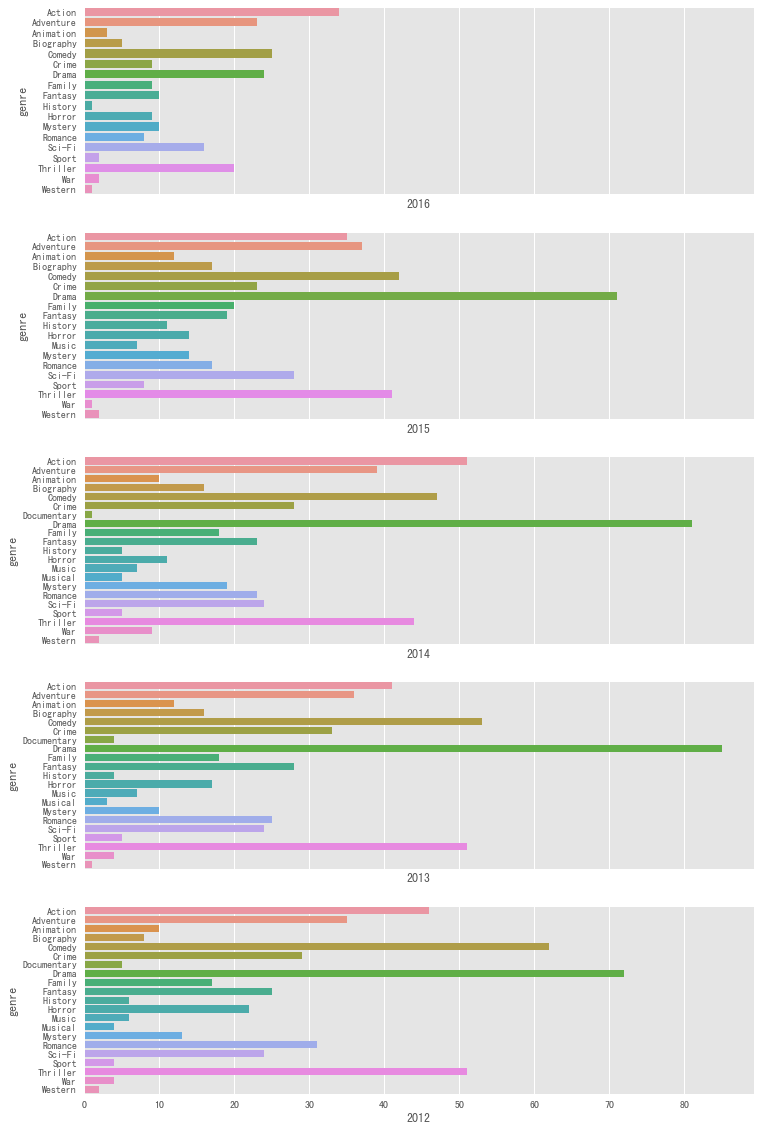

In [20]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex=True, figsize=(12, 20))

sns.barplot(x = 'count', y = 'genre', data = year_2016_gCount, ax = ax1 ); ax1.set_xlabel('2016')
plt.setp(ax1.get_xticklabels(), visible=False)
sns.barplot(x = 'count', y = 'genre', data = year_2015_gCount, ax = ax2 ); ax2.set_xlabel('2015')
plt.setp(ax2.get_xticklabels() , visible=False)
sns.barplot(x = 'count', y = 'genre', data = year_2014_gCount, ax = ax3 ); ax3.set_xlabel('2014')
plt.setp(ax3.get_xticklabels() , visible=False)
sns.barplot(x = 'count', y = 'genre', data = year_2013_gCount, ax = ax4 ); ax4.set_xlabel('2013')
plt.setp(ax4.get_xticklabels() , visible=False)
sns.barplot(x = 'count', y = 'genre', data = year_2012_gCount, ax = ax5 ); ax5.set_xlabel('2012')

In [30]:
m = raw_data[['title_year','gross', 'budget','count']].dropna()
m = m[m['budget']>m['gross']]
m.head()

,title_year,gross,budget,count
2,2015.0,200074175.0,245000000.0,1
5,2012.0,73058679.0,263700000.0,1
7,2010.0,200807262.0,260000000.0,1
11,2006.0,200069408.0,209000000.0,1
12,2008.0,168368427.0,200000000.0,1


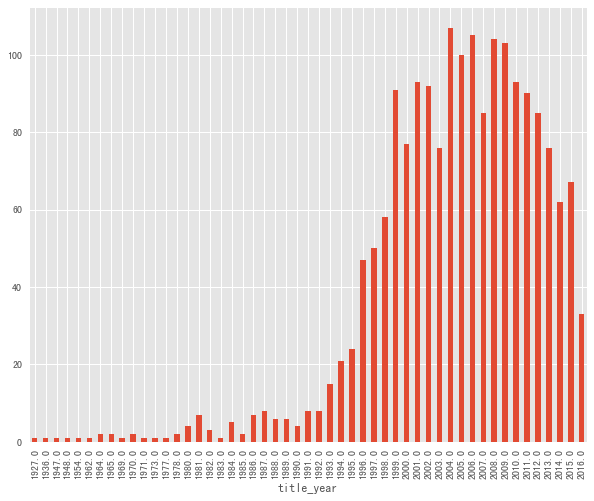

In [50]:
mo = m.groupby(['title_year'])['count'].sum()
mo.plot(kind = 'bar', figsize=(10,8))